In [1]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table

In [2]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [3]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

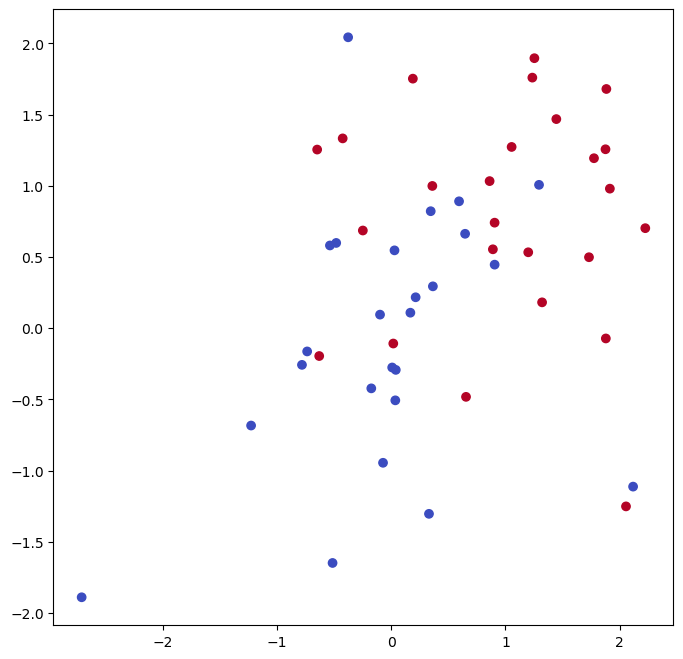

In [4]:
rng = np.random.default_rng (1)
X = rng.standard_normal ((50, 2))
y = np.array ([ -1]*25+[1]*25)
X[y==1] += 1
fig , ax = subplots(figsize =(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm);

In [5]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

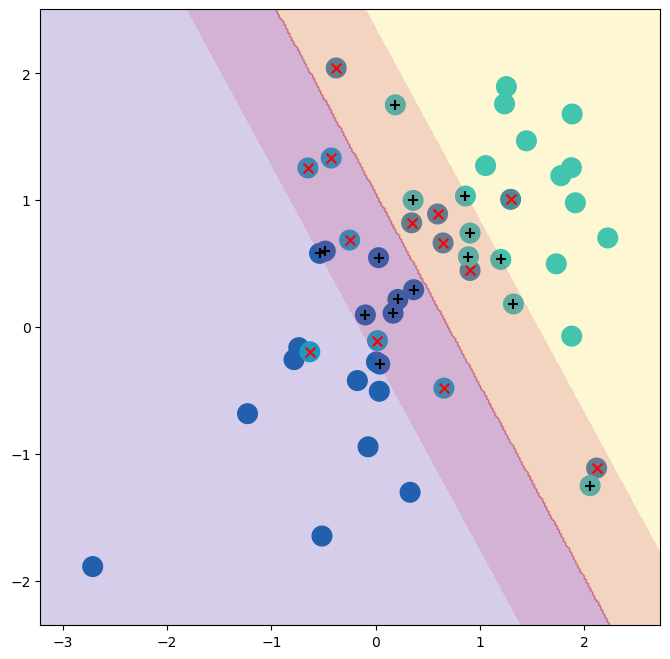

In [6]:
fig , ax = subplots(figsize =(8,8))
plot_svm(X,
y,
svm_linear ,
ax=ax)

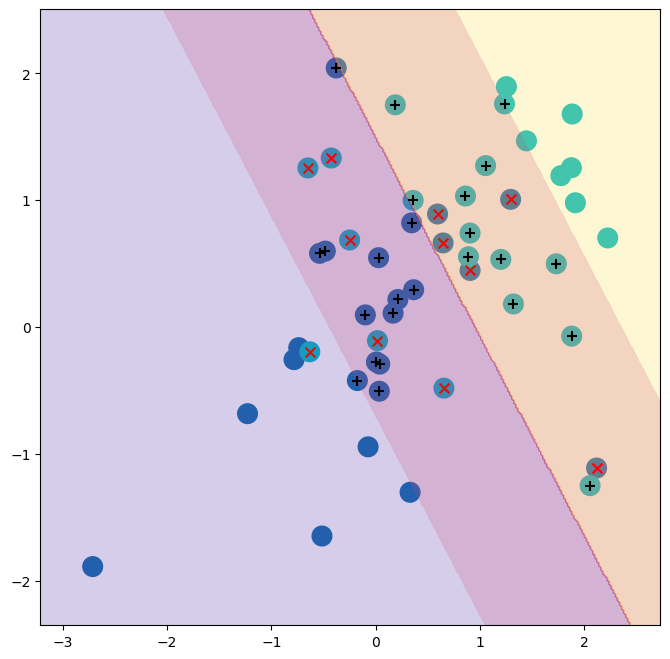

In [7]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig , ax = subplots(figsize =(8,8))
plot_svm(X,
y,
svm_linear_small ,
ax=ax)

In [8]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [9]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear ,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True ,
cv=kfold ,
scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [11]:
X_test = rng.standard_normal ((20, 2))
y_test = np.array ([ -1]*10+[1]*10)
X_test[y_test ==1] += 1

In [12]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [13]:
svm_ = SVC(C=0.001,
kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


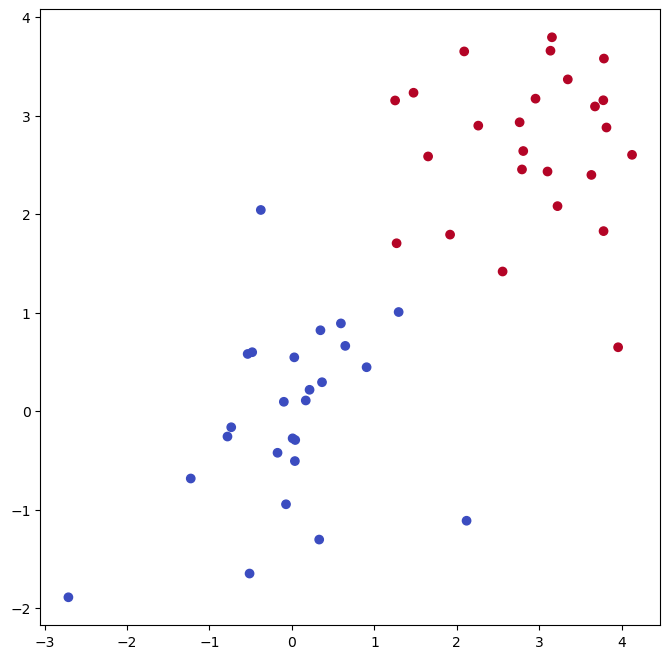

In [14]:
X[y==1] += 1.9;
fig , ax = subplots(figsize =(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [15]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


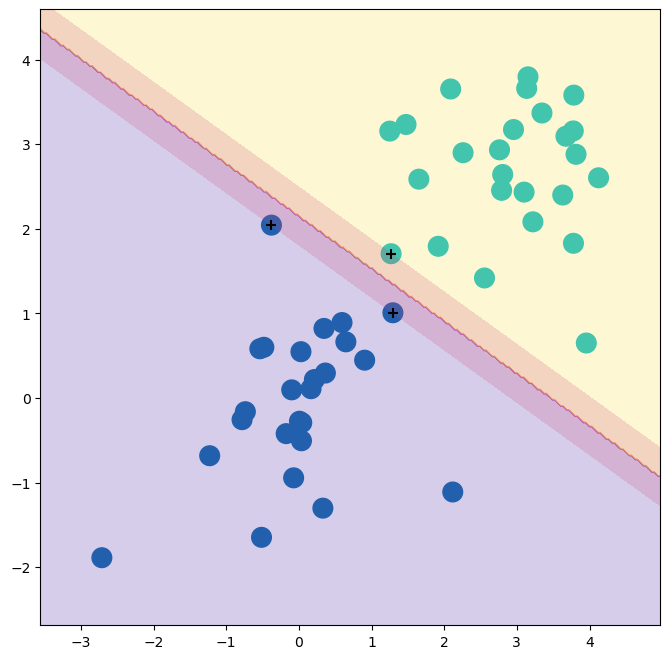

In [16]:
fig , ax = subplots(figsize =(8,8))
plot_svm(X,
y,
svm_ ,
ax=ax)

In [17]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


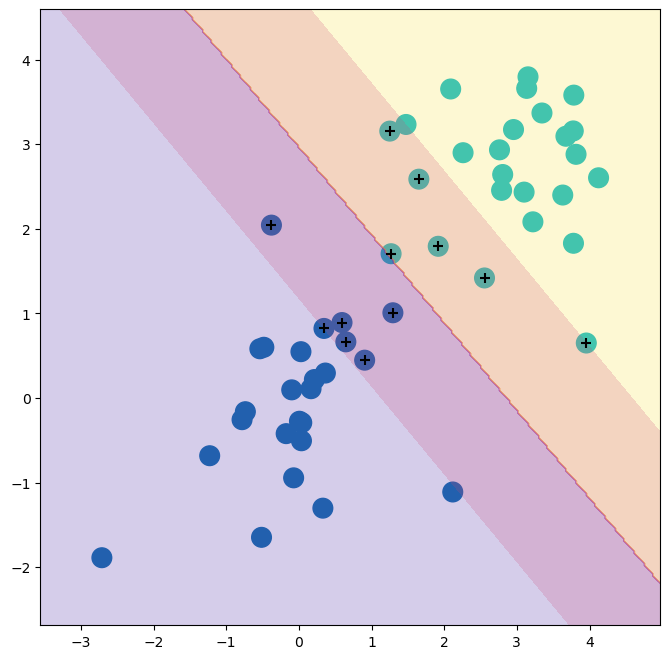

In [18]:
fig , ax = subplots(figsize =(8,8))
plot_svm(X,
y,
svm_ ,
ax=ax)

In [19]:
X = rng.standard_normal ((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array ([1]*150+[2]*50)

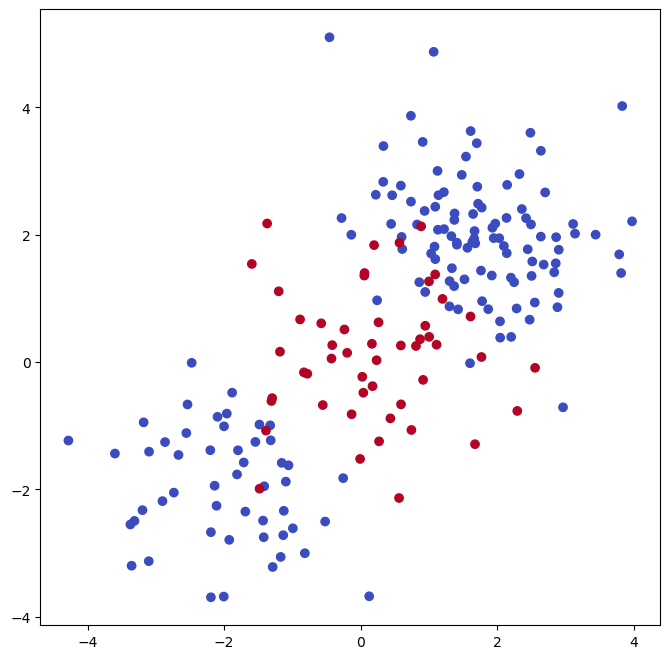

In [20]:
fig , ax = subplots(figsize =(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm)

In [21]:
(X_train ,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
y,
test_size =0.5,
random_state =0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train , y_train)

SVC(C=1, gamma=1)

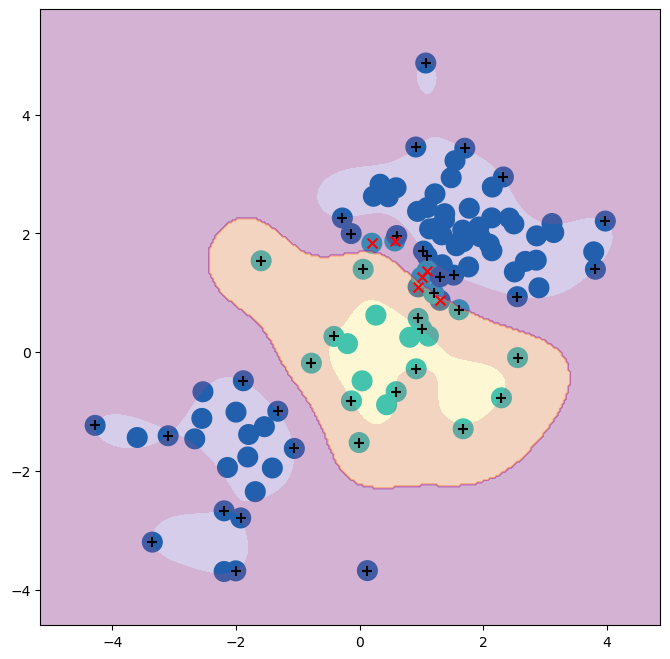

In [22]:
fig , ax = subplots(figsize =(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

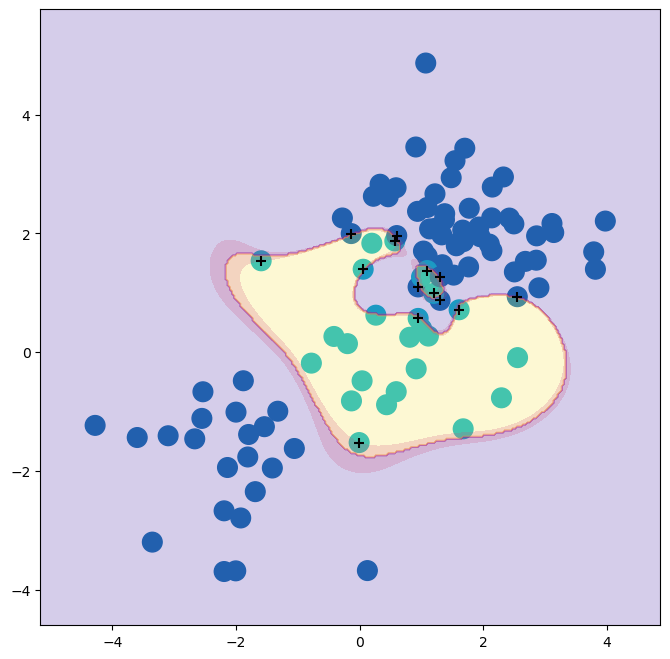

In [23]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)
fig , ax = subplots(figsize =(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

In [24]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf ,
{'C':[0.1,1,10,100,1000],
'gamma':[0.5,1,2,3,4]},
refit=True ,
cv=kfold ,
scoring='accuracy');
grid.fit(X_train , y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,69,6
2,6,19


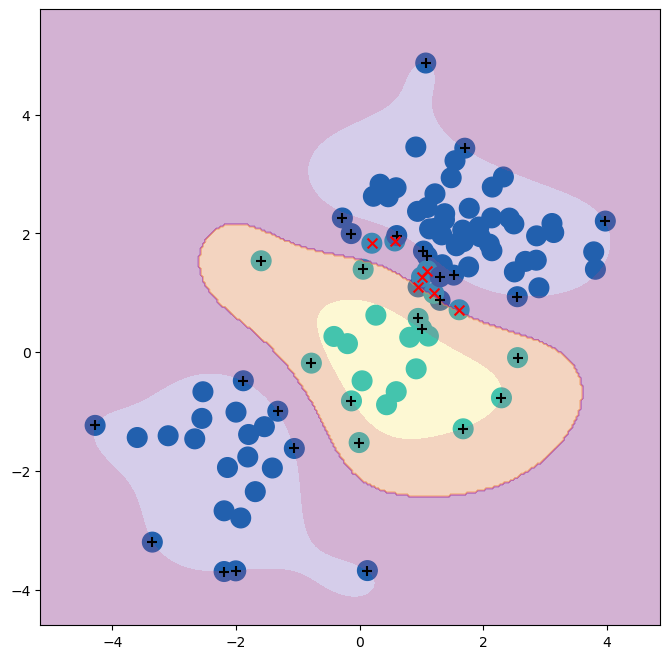

In [25]:
best_svm = grid.best_estimator_
fig , ax = subplots(figsize =(8,8))
plot_svm(X_train ,
         y_train ,
best_svm ,
ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test , y_test)